In [1]:
import os, shutil

original_dataset_dir = "cats_vs_dogs/train"

dirs = []

base_dir = "cats_vs_dogs_small"
dirs.append(base_dir)

train_dir = os.path.join(base_dir, "train")
dirs.append(train_dir)
validation_dir = os.path.join(base_dir, "validation")
dirs.append(validation_dir)
test_dir = os.path.join(base_dir, "test")
dirs.append(test_dir)

train_cats_dir = os.path.join(train_dir, "cats")
dirs.append(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, "dogs")
dirs.append(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, "cats")
dirs.append(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, "dogs")
dirs.append(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, "cats")
dirs.append(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, "dogs")
dirs.append(test_dogs_dir)

for directory in dirs:
    if not os.path.exists(directory):
       os.mkdir(directory)

fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_cats_dir, fname)
    shutil.copy(src, dest)

fnames = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_cats_dir, fname)
    shutil.copy(src, dest)

fnames = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_cats_dir, fname)
    shutil.copy(src, dest)

fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_dogs_dir, fname)
    shutil.copy(src, dest)

fnames = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_dogs_dir, fname)
    shutil.copy(src, dest)

fnames = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_dogs_dir, fname)
    shutil.copy(src, dest)

for directory in dirs:
    print(directory, ":", len(os.listdir(directory)))

print("Done.")

cats_vs_dogs_small : 3
cats_vs_dogs_small/train : 2
cats_vs_dogs_small/validation : 2
cats_vs_dogs_small/test : 2
cats_vs_dogs_small/train/cats : 1000
cats_vs_dogs_small/train/dogs : 1000
cats_vs_dogs_small/validation/cats : 500
cats_vs_dogs_small/validation/dogs : 500
cats_vs_dogs_small/test/cats : 500
cats_vs_dogs_small/test/dogs : 500
Done.


In [5]:
from keras import models, layers
model = models.Sequential()

# the first number in our layers will increase because we want to find more features. It's always a factor of 2
# we can interpret this first number as the number of features we want to extract in each convolution
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2))) # no activation function needed here because it's a linear function
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.25)) # if this is set to 1, then all the weights and biases are set to 0
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [6]:
from keras import optimizers
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
2
(10, 150, 150, 3) [0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]


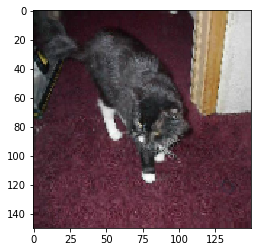

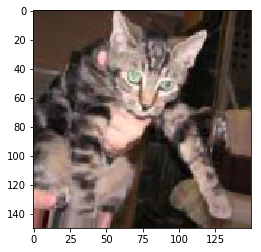

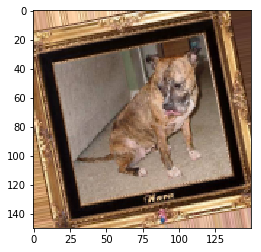

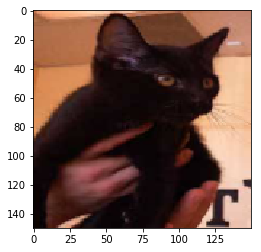

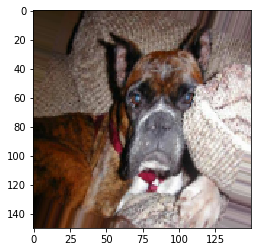

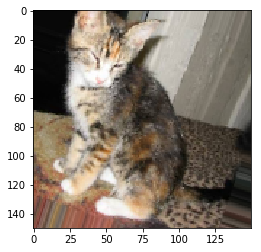

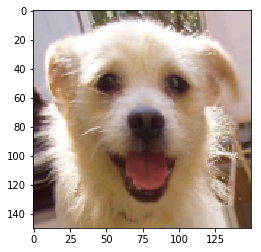

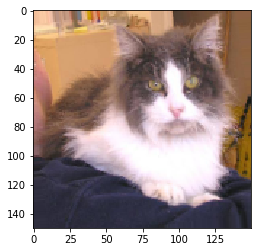

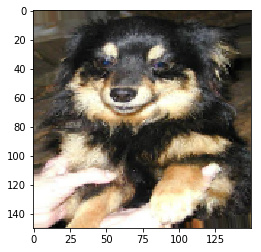

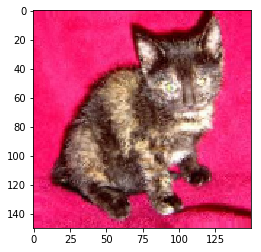

In [23]:
# there's a module in keras that can do some image data preprocessing for us
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20
)

# it randomly grabs a file, gets it class from the folder it's in, and encodes it in binary. It resizes to 150x150, and grabs 20 of these images at a time
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="binary"
)

generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=10,
    class_mode='binary'
)

import matplotlib.pyplot as plt

images = next(generator)
print(len(images))
print(images[0].shape,images[1])
for image in images[0]:
    plt.imshow(image)
    plt.show()
    plt.close()


In [16]:
# this module prevents you from having all your training data in memory. We show the fit_generator the train_generator, which is capable of going to the harddrive, finding the image, resizing it, labelling etc
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100, # we need to be careful setting this number. we have 2000 train images, and a batch size of 20, so if we want to use all our data in one epoch, we need to set this to 100. Setting it lower means you wouldn't use all your training data per epoch
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50 # same as the comment above
)

Epoch 1/30
  4/100 [>.............................] - ETA: 32:14 - loss: 0.7132 - acc: 0.4625

KeyboardInterrupt: 

In [19]:
# this is a basic generator
def generate(batch_size):
    i = 0
    while True():
        arr = []
        for _ in range(batch_size):
            i += 1
            arr.append(i)
        yield arr

g = generate(2)
print(g)
#print(next(g))
#print(next(g))

<generator object generate at 0x1047313b8>
